<a href="https://colab.research.google.com/github/SiracencoSerghei/linear_algebra/blob/main/2.8_projection_orthogon/2.8_4_QR_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt

---
# QR decomposition
---

In [6]:
# example from the slides

A = [ [1,0],
      [1,0],
      [0,1] ]

# "full" QR decomposition
Q,R = np.linalg.qr(A,'complete')
print(Q), print(' ')
print(R), print(' ')
print(Q@R)

# "economy" QR decomposition
Q,R = np.linalg.qr(A) # is the default option in Python
print(Q), print(' ')
print(R), print(' ')
print(Q@R)

[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]
 
[[-1.41421356  0.        ]
 [ 0.         -1.        ]
 [ 0.          0.        ]]
 
[[1. 0.]
 [1. 0.]
 [0. 1.]]
[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]
 
[[-1.41421356  0.        ]
 [ 0.         -1.        ]]
 
[[1. 0.]
 [1. 0.]
 [0. 1.]]


In [7]:
## another example

# the to-be-decomposed matrix
M = np.array( [ [1, 1,-2], [3,-1, 1] ] )

# QR decomposition
Q,R = np.linalg.qr(M,'complete')

# notice:
print('R from QR: '),print(np.round(R,4))
print('R from Q^TM: '),print(np.round(Q.T@M,4))

R from QR: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]
R from Q^TM: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]


(None, None)

[]

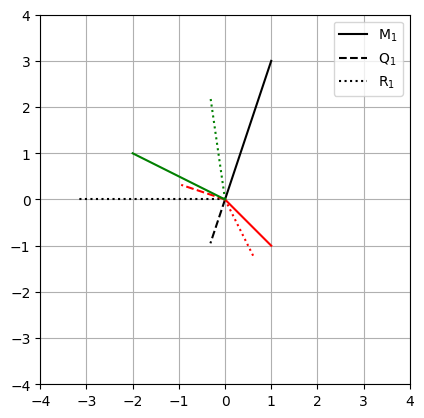

In [8]:
# plot
colorz = 'krg'

for i in range(0,np.shape(M)[1]):

    # plot original vector M
    plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])

    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],colorz[i],linestyle='--')

    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[1,i]],colorz[i],linestyle=':')


plt.legend(['M$_1$','Q$_1$','R$_1$'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.plot()

---
# Code challenge: Gram-Schmidt algoritm
---

[[ 1. -0.  0. -0.]
 [-0.  1. -0. -0.]
 [ 0. -0.  1. -0.]
 [-0. -0. -0.  1.]]


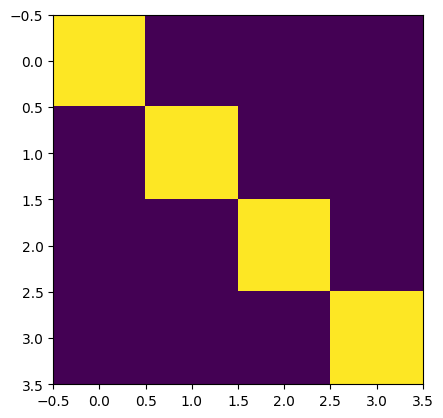

[[-0.401 -0.652 -0.635 -0.109]
 [-0.455 -0.415  0.632  0.471]
 [ 0.785 -0.513 -0.029  0.346]
 [-0.126  0.375 -0.443  0.804]]
 
[[-0.401 -0.652 -0.635 -0.109]
 [-0.455 -0.415  0.632  0.471]
 [ 0.785 -0.513 -0.029  0.346]
 [-0.126  0.375 -0.443  0.804]]


In [18]:
# Implement the G-S procedure!
# start with a square matrix, compute Q
# check Q'Q=I
# check against np.lingalg.gr()

m = 4
n = 4
A = np.random.randn(m,n)
Q = np.zeros((m,n))

# Loop over columns
for i in range(n):

  Q[:,i] = A[:,i]
  a = A[:,i]

  # step 1: orthogonalize the i-th column in Q,
          #  relative to previous column in A
  for j in range(i):
    q = Q[:,j]
    Q[:,i] = Q[:,i] - (np.dot(a,q)/ np.dot(q,q)) * q

  # step 2: normalize i-th column of Q
  Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])

# check 1:
print(np.round(Q.T@Q,3))
plt.imshow(Q.T@Q)
plt.show()

# check 2:
Q2,R = np.linalg.qr(A,'complete')

print(np.round(Q,3)), print(' ')
print(np.round(Q2,3))


---
# Matrix inverse via QR decomposition
---

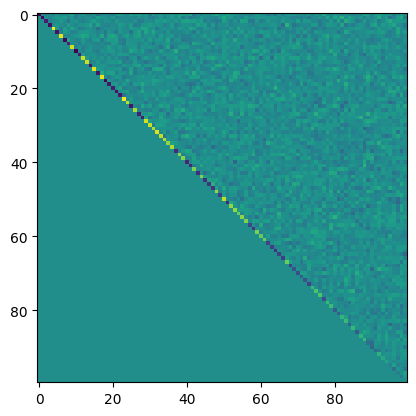

In [20]:
# inverse via QR

# generate a Large (e.g., 100) matrix and invert using QR and inv()
x = 100
O = np.random.randn(x,x)

# explicit inverse
Oi = np.linalg.inv(O)

# inverse via QR
Q,R = np.linalg.qr(O)
plt.imshow(R)
plt.show()


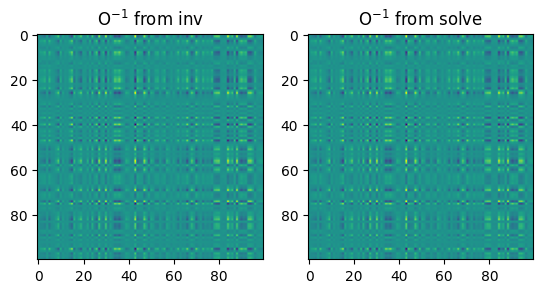

In [21]:
OiQR1 = np.linalg.inv(R)@Q.T
OiQR2 = np.linalg.solve(R,Q.T)

plt.subplot(1,2,1)
plt.imshow(OiQR1)
plt.title('O$^{-1}$ from inv')

plt.subplot(1,2,2)
plt.imshow(OiQR2)
plt.title('O$^{-1}$ from solve')

plt.show()


In [22]:
np.corrcoef((OiQR1.flatten(),OiQR2.flatten(),Oi.flatten()))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [26]:
E = np.array([[1,2],[3,4]])

# Flatten the array
print("Flattened array:", E.flatten())


Flattened array: [1 2 3 4]


---
# Code challenge: Prove and demonstrate the Sherman-Morrison inverse
---

In [36]:
# Sherman-Morrison formula

m = 5
a = np.random.randn(m)
b = np.random.randn(m)

A = np.eye(m) - np.outer(a,b)
Ai = np.eye(m) - np.outer(a,b) / (1 - np.dot(a,b))
print(np.round(A@Ai,3))

a = a / np.linalg.norm(a)
b = a

A = np.eye(m) - np.outer(a,b)
Ai = np.eye(m) - np.outer(a,b) / (1 - np.dot(a,b))
print(np.round(A@Ai,3))


[[ 0.952 -0.51   0.091 -0.275  0.84 ]
 [-0.017  0.815  0.033 -0.1    0.305]
 [ 0.091  0.974  0.826  0.526 -1.605]
 [-0.146 -1.566  0.28   0.155  2.581]
 [-0.187 -1.997  0.357 -1.078  4.292]]
[[ 0.9   -0.037  0.201 -0.209 -0.275]
 [-0.03   0.989  0.062 -0.077 -0.088]
 [ 0.169  0.062  0.772  0.345  0.433]
 [-0.24  -0.077  0.47   0.282 -0.903]
 [-0.267 -0.086  0.492 -0.871 -0.14 ]]


---
# Code Challenge: A^TA = R^TR
---

In [38]:
# show that A'A == R'R

# generate random matrix A
m = 10
n = 5
A = np.random.randn(m,n)

# compute QR decomposition
Q,R = np.linalg.qr(A)

# test the claim
np.round(A.T@A - R.T@R,4)


array([[ 0.,  0., -0.,  0., -0.],
       [ 0., -0.,  0., -0., -0.],
       [-0.,  0.,  0., -0.,  0.],
       [ 0., -0., -0.,  0., -0.],
       [-0., -0.,  0., -0.,  0.]])